# Cumulative ARPU (cohort analysis)

**Project Description:** Cohort analysis of mobile applications A and B.

**Goal:** To increase revenue from app users.

**Objectives:** Analysis of cumulative ARPU for various cohorts.

**Dataset Description:** Dataset consists of two files of 1620 and 835380 rows.

## Import libraries

In [1]:
import sys

import numpy as np
import pandas as pd


print('Python:'.ljust(16), sys.version.split('\n')[0])
print('Numpy:'.ljust(16), np.__version__)
print('Pandas:'.ljust(16), pd.__version__)

Python:          3.7.10 | packaged by conda-forge | (default, Feb 19 2021, 16:07:37) 
Numpy:           1.19.5
Pandas:          1.3.2


## Read files to dataframes

In [2]:
df_ecpm = pd.read_csv('/kaggle/input/veraxen/ecpm_aggr.csv')
df_events = pd.read_csv('/kaggle/input/veraxen/events_data.csv')

In [3]:
df_ecpm.info()
print()
df_ecpm

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6120 entries, 0 to 6119
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  6120 non-null   int64  
 1   ecpm_value  6120 non-null   float64
 2   date        6120 non-null   object 
 3   app         6120 non-null   object 
 4   country     6120 non-null   object 
 5   ecpm_type   6120 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 287.0+ KB



,Unnamed: 0,ecpm_value,date,app,country,ecpm_type
0,0,0.757282,2021-06-04 13:30:27.883259,awesome app A,US,banner
1,1,0.788831,2021-06-05 13:30:27.883259,awesome app A,US,banner
2,2,0.796442,2021-06-06 13:30:27.883259,awesome app A,US,banner
3,3,0.807773,2021-06-07 13:30:27.883259,awesome app A,US,banner
4,4,0.747525,2021-06-08 13:30:27.883259,awesome app A,US,banner
...,...,...,...,...,...,...
6115,85,9.126382,2021-08-28 13:30:27.883259,brilliant app B,ES,interstitial
6116,86,9.451709,2021-08-29 13:30:27.883259,brilliant app B,ES,interstitial
6117,87,8.875883,2021-08-30 13:30:27.883259,brilliant app B,ES,interstitial
6118,88,8.879324,2021-08-31 13:30:27.883259,brilliant app B,ES,interstitial


In [4]:
df_events.info()
print()
df_events

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 835380 entries, 0 to 835379
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Unnamed: 0           835380 non-null  int64  
 1   date                 835380 non-null  object 
 2   app                  835380 non-null  object 
 3   version              835380 non-null  float64
 4   network              835380 non-null  object 
 5   event_type           835380 non-null  object 
 6   installs             835380 non-null  int64  
 7   days_after_installs  835380 non-null  int64  
 8   country              835380 non-null  object 
 9   events_amount        835380 non-null  float64
dtypes: float64(2), int64(3), object(5)
memory usage: 63.7+ MB



,Unnamed: 0,date,app,version,network,event_type,installs,days_after_installs,country,events_amount
0,0,2021-06-30 14:25:35.063117,awesome app A,1.0,AdNetwork P,interstitial,95897,0,US,757128.0
1,1,2021-06-30 14:25:35.063117,awesome app A,1.0,AdNetwork P,interstitial,95897,1,US,799973.0
2,2,2021-06-30 14:25:35.063117,awesome app A,1.0,AdNetwork P,interstitial,95897,2,US,655098.0
3,3,2021-06-30 14:25:35.063117,awesome app A,1.0,AdNetwork P,interstitial,95897,3,US,713709.0
4,4,2021-06-30 14:25:35.063117,awesome app A,1.0,AdNetwork P,interstitial,95897,4,US,588658.0
...,...,...,...,...,...,...,...,...,...,...
835375,39,2021-07-20 14:25:35.063117,brilliant app B,2.2,AdNetwork S,banner,72281,39,ES,1125075.0
835376,40,2021-07-20 14:25:35.063117,brilliant app B,2.2,AdNetwork S,banner,72281,40,ES,1366665.0
835377,41,2021-07-20 14:25:35.063117,brilliant app B,2.2,AdNetwork S,banner,72281,41,ES,1069572.0
835378,42,2021-07-20 14:25:35.063117,brilliant app B,2.2,AdNetwork S,banner,72281,42,ES,1354628.0


## Format and merge dataframes

In [5]:
# Rename dataframe columns
df_ecpm.rename(columns={'ecpm_type': 'event_type', 'ecpm_value': 'ecpm'}, inplace=True)

# Drop first columns
df_ecpm.drop(df_ecpm.columns[0], axis=1, inplace=True)
df_events.drop(df_events.columns[0], axis=1, inplace=True)

# Convert 'date' columns to date of datetime type
df_ecpm['date'] = pd.to_datetime(df_ecpm['date']).dt.normalize()
df_events['date'] = pd.to_datetime(df_events['date']).dt.normalize()

# Add 'days_after_installs' to 'date' column of 'df_events' dataframe
df_events['date'] = df_events['date'] + pd.to_timedelta(df_events['days_after_installs'], unit='D')

# Merge dataframes
df = df_events.merge(df_ecpm, how='left')

# Create 'revenue' column
df['revenue'] = df['ecpm'] * df['events_amount'] / 1000

# Drop unnecessary columns
df.drop(['ecpm', 'events_amount', 'version', 'network', 'date'], axis=1, inplace=True)

In [6]:
# Show merged dataframe
df.info()
print()
df

<class 'pandas.core.frame.DataFrame'>
Int64Index: 835380 entries, 0 to 835379
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   app                  835380 non-null  object 
 1   event_type           835380 non-null  object 
 2   installs             835380 non-null  int64  
 3   days_after_installs  835380 non-null  int64  
 4   country              835380 non-null  object 
 5   revenue              835380 non-null  float64
dtypes: float64(1), int64(2), object(3)
memory usage: 44.6+ MB



,app,event_type,installs,days_after_installs,country,revenue
0,awesome app A,interstitial,95897,0,US,8589.375859
1,awesome app A,interstitial,95897,1,US,8557.127849
2,awesome app A,interstitial,95897,2,US,7252.985597
3,awesome app A,interstitial,95897,3,US,8207.995990
4,awesome app A,interstitial,95897,4,US,6737.868711
...,...,...,...,...,...,...
835375,brilliant app B,banner,72281,39,ES,716.384442
835376,brilliant app B,banner,72281,40,ES,905.345949
835377,brilliant app B,banner,72281,41,ES,720.728900
835378,brilliant app B,banner,72281,42,ES,897.327767


## Group by all cohorts. Sort

In [7]:
# Group by cohorts
df = df.groupby(['days_after_installs', 'app', 'event_type', 'country']).sum().reset_index()

# Sort dataframe
df.sort_values(['app', 'event_type', 'country', 'days_after_installs'], ignore_index=True, inplace=True)

In [8]:
# Show dataframe
df.info()
print()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6120 entries, 0 to 6119
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   days_after_installs  6120 non-null   int64  
 1   app                  6120 non-null   object 
 2   event_type           6120 non-null   object 
 3   country              6120 non-null   object 
 4   installs             6120 non-null   int64  
 5   revenue              6120 non-null   float64
dtypes: float64(1), int64(2), object(3)
memory usage: 287.0+ KB



,days_after_installs,app,event_type,country,installs,revenue
0,0,awesome app A,banner,AU,23128222,1.449823e+06
1,1,awesome app A,banner,AU,22870597,1.304367e+06
2,2,awesome app A,banner,AU,22614156,1.186410e+06
3,3,awesome app A,banner,AU,22357829,1.077066e+06
4,4,awesome app A,banner,AU,22100515,9.884495e+05
...,...,...,...,...,...,...
6115,85,brilliant app B,interstitial,VN,1513940,1.134579e+04
6116,86,brilliant app B,interstitial,VN,1210165,8.715326e+03
6117,87,brilliant app B,interstitial,VN,907559,3.464231e+03
6118,88,brilliant app B,interstitial,VN,604747,5.108023e+03


## Group by various cohorts and calculate cumulative ARPU

In [9]:
def get_cohort(df, cohort_name):
    """Returns CARPU dataframe for a specific cohort
    """
    # Group by cohort
    cohort = df.groupby([cohort_name, 'days_after_installs']).sum()

    # Create ARPU column
    cohort['arpu'] = cohort['revenue'] / cohort['installs']

    # Create column for cumulative ARPU
    cohort['cumul_arpu'] = cohort.groupby(level=cohort_name).cumsum()['arpu']

    # Drop unnecessary columns
    cohort.drop(['installs', 'revenue', 'arpu'], axis=1, inplace=True)

    # Unstack dataframe
    cohort = cohort.unstack(level=cohort_name)

    # Rename dataframe columns
    cohort = cohort.droplevel(0, axis=1)
    cohort.columns = list(cohort.columns)
    
    return cohort

In [10]:
# Get cohorts
app_cohort = get_cohort(df, 'app')
event_type_cohort = get_cohort(df, 'event_type')
country_cohort = get_cohort(df, 'country')

## Plot cumulative ARPU for various cohorts

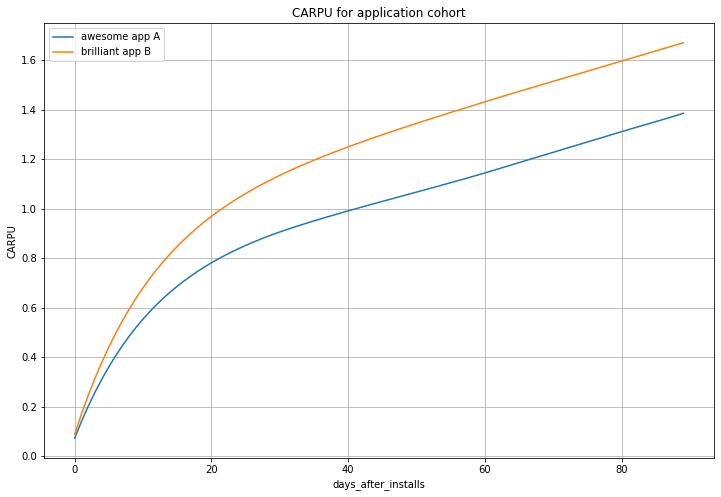

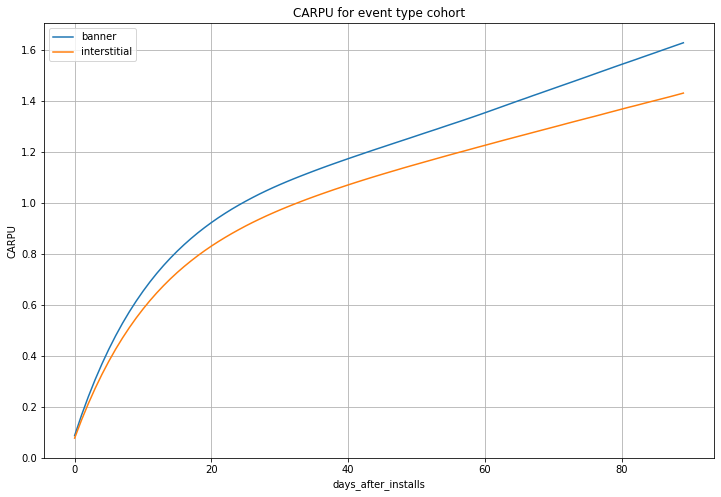

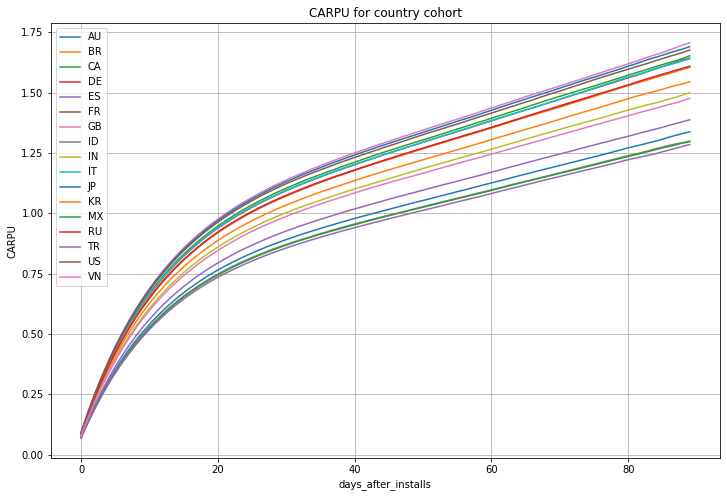

In [11]:
app_cohort.plot(title='CARPU for application cohort', ylabel='CARPU', figsize=(12, 8), grid=True);
event_type_cohort.plot(title='CARPU for event type cohort', ylabel='CARPU', figsize=(12, 8), grid=True);
country_cohort.plot(title='CARPU for country cohort', ylabel='CARPU', figsize=(12, 8), grid=True);

In [12]:
country_cohort

,AU,BR,CA,DE,ES,FR,GB,ID,IN,IT,JP,KR,MX,RU,TR,US,VN
days_after_installs,,,,,,,,,,,,,,,,,
0,0.071052,0.082442,0.088011,0.085243,0.073401,0.087110,0.090392,0.069441,0.079741,0.087179,0.090167,0.085659,0.068961,0.085424,0.068218,0.089425,0.078568
1,0.136318,0.158293,0.168637,0.163816,0.141375,0.167350,0.173812,0.133533,0.153111,0.167606,0.173320,0.164510,0.132319,0.164123,0.130980,0.171724,0.150942
2,0.196531,0.228151,0.243029,0.236228,0.203738,0.241206,0.250576,0.192567,0.220920,0.241826,0.249756,0.237240,0.190785,0.236561,0.188719,0.247657,0.217472
3,0.251988,0.292562,0.311544,0.302933,0.261334,0.309437,0.321602,0.247067,0.283413,0.310070,0.320059,0.304216,0.244603,0.303220,0.242081,0.317612,0.278926
4,0.303322,0.352120,0.374892,0.364687,0.314629,0.371921,0.387235,0.297339,0.340702,0.373012,0.385159,0.365765,0.294455,0.364594,0.291526,0.381797,0.335621
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,1.306787,1.513579,1.615984,1.572537,1.356250,1.607583,1.665774,1.274223,1.465299,1.607628,1.654872,1.570717,1.270665,1.576594,1.254876,1.640735,1.443256
86,1.315702,1.522050,1.624420,1.579696,1.364593,1.616998,1.676176,1.281173,1.473021,1.615088,1.664260,1.579879,1.277127,1.584366,1.262205,1.649736,1.451177
87,1.323268,1.530282,1.632581,1.588680,1.371981,1.625820,1.686947,1.288202,1.480978,1.623028,1.672716,1.588473,1.283768,1.593274,1.269571,1.658099,1.458028


## Conclusions
1. CARPU of all cohorts does not have saturation (it grows significantly throughout).
2. CARPU growth of all cohorts slows down by the 30th day. Further, the growth is approximately constant.
3. 'brilliant app B' app has a 25% higher CARPU by the 40th day compared to 'awesome app A'. Further, the difference is approximately constant and is 0.3 ARPU.
4. 'banner' ad type has a 10% higher CARPU by the 40th day compared to 'interstitial'. The difference in ARPU grows throughout and by the 90th day is 0.2 ARPU.
5. The UK is the most profitable. Turkey is the least profitable. By the 40th day, the difference between them is 0.3 ARPU. By the 90th day - 0.4 ARPU.

## Disadvantages
- A bug was not found in one of the application versions.
- No assessment of network attraction channels.